In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc('font',size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

## 葡萄牙某银行战略分析，目标：根据客户个人信息，判断用户是否会购买该银行一种定期产品

### Data

In [2]:
data = pd.read_csv('banking.csv',header=0)

In [3]:
data.shape

(41188, 21)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
data.columns
# 部分特征说明：
# default:是否有信用违约；housing:是否有房贷；loan：是否有个人贷款；contact：联系方式；month：年度最后一次联系的月份；
# day_of_week：最后一次联系的星期；duration：上次通话时长；campaign：针对此用户发起的营销次数；pdays：上次营销行为到现在的天数(999代表未联系)
# previous:本次营销行为前和客户联系过的次数；poutcome：上一次营销活动的结果；
# emp.var.rate:就业变动率；cons.price.idx:消费物价指数；cons.conf.idx:消费者信心指数；euribor3m:欧元同业拆借利率；nr.employeed：员工数量
# Y——客户存钱了吗

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
data.info()     # 未见显式空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [7]:
data.dropna()
data.shape

(41188, 21)

In [8]:
data.drop_duplicates()
data.shape

(41188, 21)

In [9]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [10]:
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])

In [11]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data Clean

In [12]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']     #类别变量(离散型)
print(cat_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [13]:
# dataFrame中无显式缺失值,缺失值以unknown,nonexistent,999表现
am_cat_var = list.copy(cat_vars)
am_cat_var.append('pdays')
print(am_cat_var)
total = data.shape[0]
def print_missing_value_and_pct(data,am_cat_var):    
    for col in am_cat_var:
        value_map = data[col].value_counts().to_dict()
        if 'unknown' in value_map.keys():
            missing_value = value_map['unknown']
        elif 'nonexistent' in value_map.keys():
            missing_value = value_map['nonexistent']
        elif 999 in value_map.keys():
            missing_value = value_map[999]     # 不是字符串类型
        else:
            continue
        print(f"feature {col} has {missing_value} rows missing,missing_rate is {round(missing_value/total,3)*100}%")
print_missing_value_and_pct(data,am_cat_var)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']
feature job has 330 rows missing,missing_rate is 0.8%
feature marital has 80 rows missing,missing_rate is 0.2%
feature education has 1731 rows missing,missing_rate is 4.2%
feature default has 8597 rows missing,missing_rate is 20.9%
feature housing has 990 rows missing,missing_rate is 2.4%
feature loan has 990 rows missing,missing_rate is 2.4%
feature poutcome has 35563 rows missing,missing_rate is 86.3%
feature pdays has 39673 rows missing,missing_rate is 96.3%


In [14]:
data['poutcome'].value_counts().sort_index()

failure         4252
nonexistent    35563
success         1373
Name: poutcome, dtype: int64

In [15]:
pd.crosstab(data['poutcome'],data['pdays']).transpose()

poutcome,failure,nonexistent,success
pdays,,,
0,0,0,15
1,0,0,26
2,0,0,61
3,4,0,435
4,2,0,116
5,4,0,42
6,25,0,387
7,15,0,45
8,6,0,12


In [16]:
# data_1 = data.drop(columns='poutcomes',axis=1)     虽然缺失比例很高，但不能随便删
data['pdays'].value_counts().sort_index()

0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

(array([ 15.,  26.,  61., 439., 118.,  46., 412.,  60.,  18.,   0.,  64.,
         52.,  28.,  58.,  36.,  20.,  24.,  11.,   8.,   0.,   7.,   3.,
          1.,   2.,   3.,   0.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
        19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. ]),
 <a list of 30 Patch objects>)

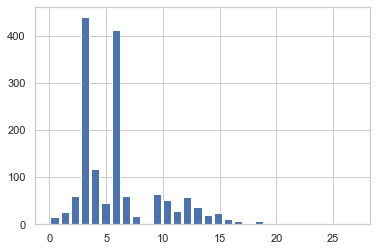

In [17]:
ser_pdays = data['pdays'][data['pdays']!=999]
plt.hist(ser_pdays,bins=30,rwidth=0.8)

In [18]:
pdays_level_df = data['pdays'].apply(lambda x:int(x/3)*3)
pd.crosstab(pdays_level_df,data['y'])

y,0,1
pdays,,
0,47,55
3,213,390
6,149,341
9,64,80
12,49,65
15,19,24
18,6,5
21,1,4
24,0,2


#### 处理空值策略，先清除独立且少量的空值，再处理大量且与其它有关联关系的空值，此处先清除marital和job的空值

In [19]:
data.drop(data[data['marital']=='unknown'].index,inplace=True,axis=0)
data.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [20]:
data.drop(data[data['job']=='unknown'].index,inplace=True,axis=0)
data.job.value_counts()

admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: job, dtype: int64

#### loan和housing的缺失值高度相关，可在检查后清除

In [21]:
pd.crosstab(data.housing,data.loan)     # 两项贷款均未知，可以直接删除

loan,no,unknown,yes
housing,,,
no,15897,0,2530
unknown,0,984,0
yes,17723,0,3653


In [22]:
data.drop(data[data['housing']=='unknown'].index,inplace=True,axis=0)
data['housing'].value_counts()

yes    21376
no     18427
Name: housing, dtype: int64

In [23]:
data['loan'].value_counts()

no     33620
yes     6183
Name: loan, dtype: int64

#### 对于学历的缺失值，根据这个职位的各个学历的权重随机生成来填补

In [24]:
import random

In [25]:
df_edu_job = pd.crosstab(data.education,data.job)
df_edu_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
education,,,,,,,,,,,
Basic,713,7159,408,624,343,794,324,723,132,520,322
high.school,3245,858,227,170,291,267,117,2616,349,854,250
illiterate,1,8,2,1,0,3,3,0,0,0,0
professional.course,355,443,129,59,85,235,160,213,42,3241,138
university.degree,5623,92,594,133,2009,278,745,164,165,1765,253
unknown,244,441,57,41,122,94,27,146,163,204,19


In [26]:
df_edu_job.drop(index='unknown',inplace=True)     # 排除educationunknown的影响

In [27]:
# for edu_val in edu_pro_val:
#     print(f"count of {edu_val}:{data[(data['education'] == edu_val) & (data['job'] == 'admin.') ].shape[0]}")
# 空值处理：先处理marital和job，再处理loan/housing，再处理edu，最后处理default
# list({edu_val:data[(data['education'] == edu_val) & (data['job'] == 'admin.') ].shape[0]} for edu_val in edu_pro_val)
def run_out_edu(row):
    if row['education'] != 'unknown':
        return row
    else:
        this_job = row['job']
        all_job_list = list(data['job'].unique())
        for job in all_job_list:
            if job != this_job:
                continue
            else:
                total_weight = 0
                cur_weight = 0
                edu_dict = dict(df_edu_job[job])     # df_edu_job 由crosstab求得
                total_weight = df_edu_job[job].sum()
                for edu in edu_dict.keys():
                    edu_weight = edu_dict[edu]
                    rand_num = random.uniform(0,total_weight)
                    cur_weight += edu_weight
                    if cur_weight >= rand_num:
                        row['education'] = edu
                        break
                break
        return row

In [28]:
data = data.apply(run_out_edu,axis=1)
data['education'].value_counts()

Basic                  12645
university.degree      11955
high.school             9726
professional.course     5264
illiterate               213
Name: education, dtype: int64

#### default unknown 填补策略：满足下列五个条件之三可认为其没有信用违约记录：
<p style='color:navy;font-size:14px;'>1.工作属性属于：学生，高管，技术员，经理，自营/创业者</p>
<p style='color:navy;font-size:14px;'>2.年龄小于24或年龄大于60</p>
<p style='color:navy;font-size:14px;'>3.本科学历</p>
<p style='color:navy;font-size:14px;'>4.单身</p>
<p style='color:navy;font-size:14px;'>5.无房贷及个人贷</p>

In [29]:
data['default'].value_counts()

no         31587
unknown     8213
yes            3
Name: default, dtype: int64

In [30]:
data[data['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
229,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
6934,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
22050,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [31]:
def defaultCompareOther(dataset,feature):
    tab = pd.crosstab(dataset['default'],dataset[feature]).apply(lambda x:x/x.sum()*100)
    tab_pct = tab.transpose()
    print(tab_pct)
    x = tab_pct.index.values
    plt.figure(figsize=(14,3))
    plt.plot(x,tab_pct['unknown'],color='green',label='unknown')
    plt.plot(x,tab_pct['yes'],color='blue',label='yes')
    plt.plot(x,tab_pct['no'],color='red',label='no')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('rate')
    plt.show()

default               no    unknown       yes
job                                          
admin.         87.574894  12.425106  0.000000
blue-collar    65.892679  34.107321  0.000000
entrepreneur   79.251941  20.748059  0.000000
housemaid      70.136187  29.863813  0.000000
management     84.315789  15.684211  0.000000
retired        77.079593  22.920407  0.000000
self-employed  80.305233  19.694767  0.000000
services       76.799586  23.200414  0.000000
student        87.896592  12.103408  0.000000
technician     85.571081  14.398542  0.030377
unemployed     76.578411  23.319756  0.101833


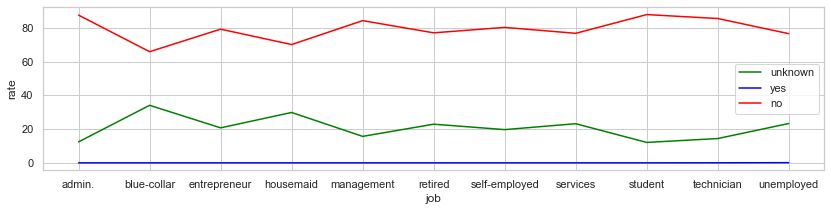

In [32]:
defaultCompareOther(data,'job')

default                     no    unknown       yes
education                                          
Basic                66.682483  33.317517  0.000000
high.school          82.839811  17.149907  0.010282
illiterate           70.892019  29.107981  0.000000
professional.course  84.308511  15.653495  0.037994
university.degree    87.904642  12.095358  0.000000


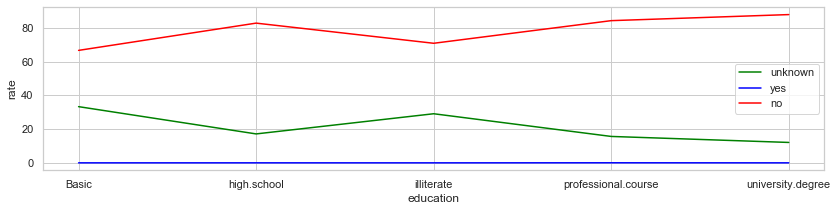

In [33]:
defaultCompareOther(data,'education')

default          no    unknown       yes
marital                                 
divorced  82.045556  17.954444  0.000000
married   75.105765  24.881792  0.012443
single    87.427552  12.572448  0.000000


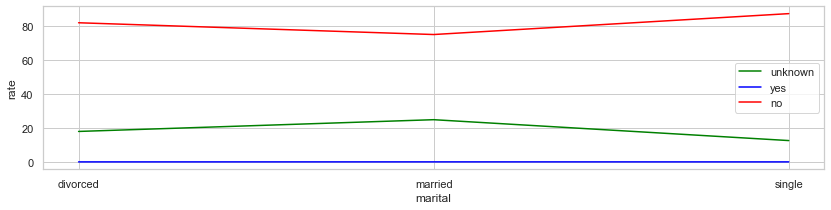

In [34]:
defaultCompareOther(data,'marital')

default           no    unknown       yes
age_group                                
1          93.184031   6.815969  0.000000
2          87.943357  12.049963  0.006680
3          72.604412  27.386869  0.008719
4          93.425606   6.574394  0.000000


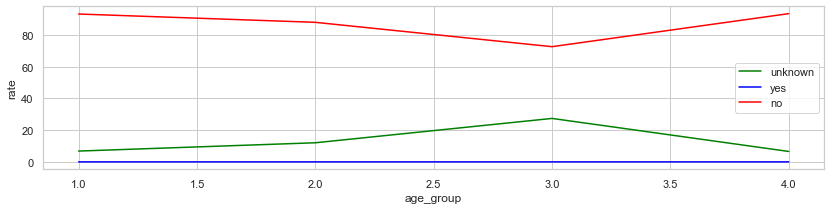

In [35]:
data['age'].value_counts().sort_index()     # 17-98
def into_age_groups(age):
    group_code = 0
    if age <= 24:
        group_code = 1
    elif age > 24 and age <= 35:
        group_code = 2
    elif age > 35 and age <= 60:
        group_code = 3
    elif age > 60:
        group_code = 4
    return group_code
data['age_group'] = data['age'].apply(lambda x:into_age_groups(x))
defaultCompareOther(data,'age_group')
# data.drop('age_group',axis=1)

In [36]:
def credit_grade_judgement(row):
    if row['job'] in ['student','admin','technican','management','self-employed']:
        row['credit_grade'] += 1
    if row['education'] == 'university.degree':
        row['credit_grade'] += 1
    if row['marital'] == 'single':
        row['credit_grade'] += 1
    if row['age'] < 24 or row['age'] > 35:
        row['credit_grade'] += 1
    if row['loan'] == 'no' and row['housing']:
        row['credit_grade'] += 1
    return row

def modify_part_data(row):
    if row['credit_grade'] >= 3 and row['default'] == 'unknown':
        row['default'] = 'no'
    elif row['credit_grade'] < 3 and row['default'] == 'unknown':
        row['default'] = 'yes'
    return row

In [37]:
data['credit_grade'] = 0
data = data.apply(credit_grade_judgement,axis=1)
data[['age','job','marital','education','default','housing','loan','credit_grade']]

,age,job,marital,education,default,housing,loan,credit_grade
0,44,blue-collar,married,Basic,unknown,yes,no,2
1,53,technician,married,high.school,no,no,no,2
2,28,management,single,university.degree,no,yes,no,4
3,39,services,married,high.school,no,no,no,2
4,55,retired,married,Basic,no,yes,no,2
...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,1
41184,31,housemaid,married,Basic,unknown,no,no,1
41185,42,admin.,single,university.degree,unknown,yes,yes,3
41186,48,technician,married,professional.course,no,no,yes,1


In [38]:
data = data.apply(modify_part_data,axis=1)
data['default'].value_counts()

no     33581
yes     6222
Name: default, dtype: int64

In [39]:
data.drop(columns=['age_group','credit_grade'],axis=1,inplace=True)
data.shape

(39803, 21)

In [40]:
data['default'] = data['default'].map({'yes':1,'no':0})
data['default'].value_counts()

0    33581
1     6222
Name: default, dtype: int64

In [41]:
print_missing_value_and_pct(data,am_cat_var)     # 空值处理过后检查，此处未处理pdays和poutcome的空值

feature poutcome has 34372 rows missing,missing_rate is 83.5%
feature pdays has 38347 rows missing,missing_rate is 93.10000000000001%


### Data Explore

In [42]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [43]:
data['y'].value_counts()

0    35316
1     4487
Name: y, dtype: int64

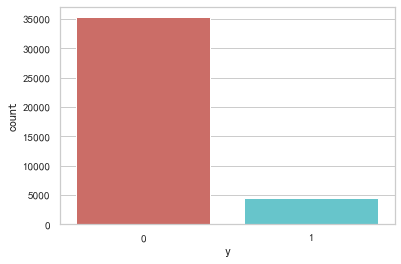

In [44]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

In [45]:
data.groupby('y').mean()

,age,default,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,
0,39.867822,0.166978,221.092309,2.630904,984.269566,0.132490,0.245999,93.601181,-40.611117,3.808003,5176.116052
1,40.864943,0.072431,553.271897,2.056162,792.726543,0.487854,-1.228438,93.353889,-39.811923,2.129602,5095.551972


job-blue-collar购买率：6.9%
job-technician购买率：10.7%
job-management购买率：11.4%
job-services购买率：8.200000000000001%
job-retired购买率：25.3%
job-admin.购买率：13.0%
job-housemaid购买率：10.0%
job-unemployed购买率：14.6%
job-entrepreneur购买率：8.5%
job-self-employed购买率：10.7%
job-student购买率：31.0%
marital-married购买率：10.2%
marital-single购买率：14.000000000000002%
marital-divorced购买率：10.4%
education-Basic购买率：8.799999999999999%
education-high.school购买率：11.200000000000001%
education-university.degree购买率：13.700000000000001%
education-professional.course购买率：11.4%
education-illiterate购买率：19.7%
default-1购买率：5.2%
default-0购买率：12.4%
housing-yes购买率：11.600000000000001%
housing-no购买率：10.9%
loan-no购买率：11.3%
loan-yes购买率：11.0%
contact-cellular购买率：14.7%
contact-telephone购买率：5.3%
month-aug购买率：10.5%
month-nov购买率：10.100000000000001%
month-jun购买率：10.6%
month-apr购买率：20.4%
month-jul购买率：9.0%
month-may购买率：6.5%
month-oct购买率：44.0%
month-mar购买率：50.9%
month-dec购买率：48.9%
month-sep购买率：44.7%
day_of_week-thu购买率：12.1%
day_of_week-fri购买率：10.8%
day_of_we

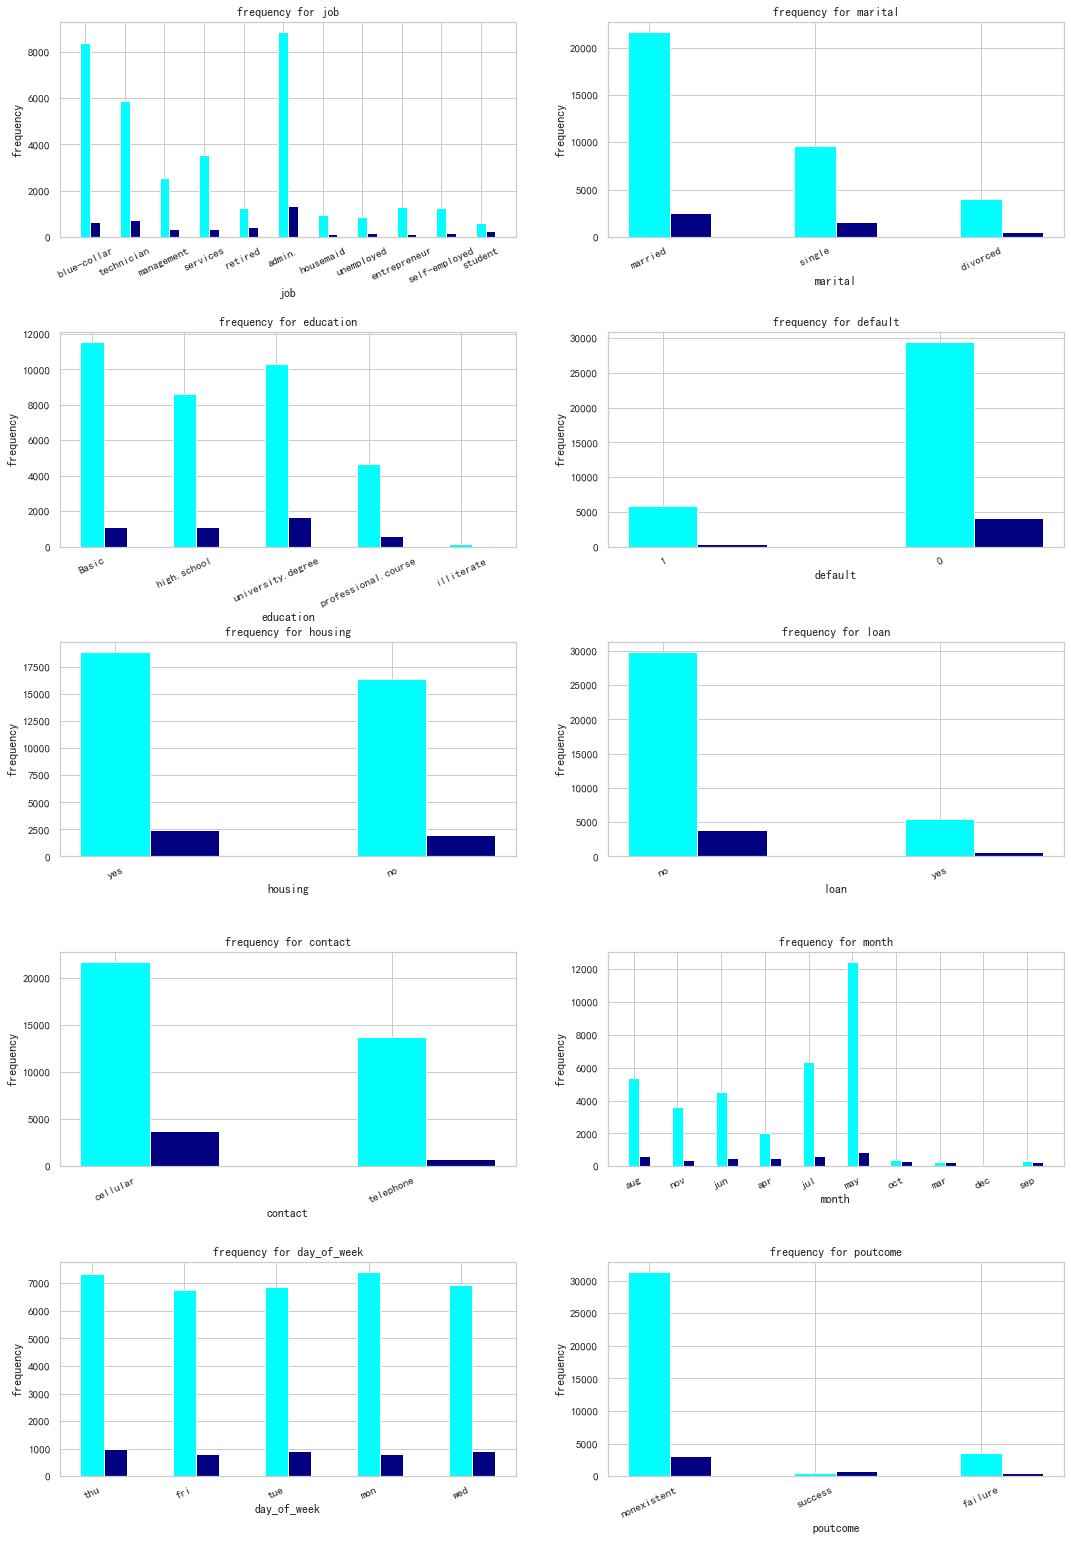

In [46]:
fig = plt.figure(figsize=(18,26.75))
plt.subplots_adjust(wspace=0.2,hspace=0.445)
for i,col_name in enumerate(cat_vars):
    ax = fig.add_subplot(5,2,(i+1))
    data_tmp = pd.crosstab(data[col_name],data.y)
    feature_values = data[col_name].unique()
    bar_width = 0.25
    for j,value in enumerate(feature_values):
        y = list(data_tmp.loc[value])
        print(f"{col_name}-{value}购买率：{round(y[1]/(y[0]+y[1]),3)*100}%")
        if j==0:
            ax.bar(j,y[0],bar_width,color='aqua',label='未购买')
            ax.bar(j+bar_width,y[1],bar_width,color='navy',label='已购买')
        else:
            ax.bar(j,y[0],bar_width,color='aqua')
            ax.bar(j+bar_width,y[1],bar_width,color='navy')
    plt.title(f"frequency for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("frequency")    
    plt.xticks(ticks=range(0,len(feature_values)),labels=list(feature_values),rotation=25)

In [47]:
data['education'].value_counts()

Basic                  12645
university.degree      11955
high.school             9726
professional.course     5264
illiterate               213
Name: education, dtype: int64

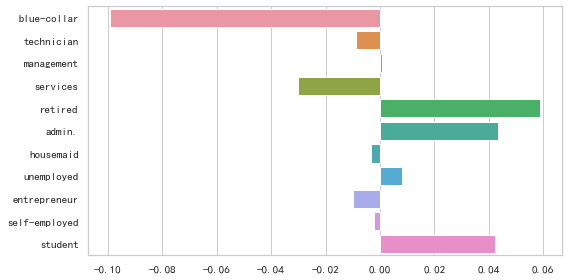

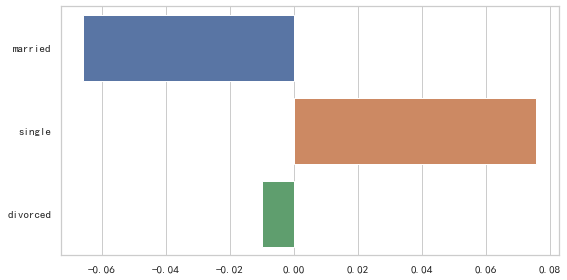

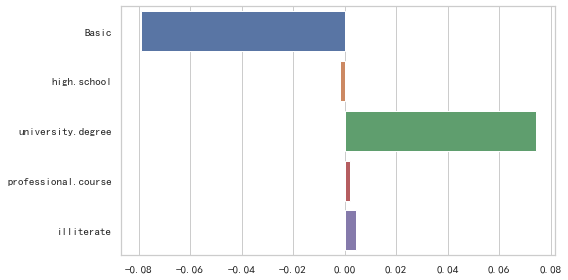

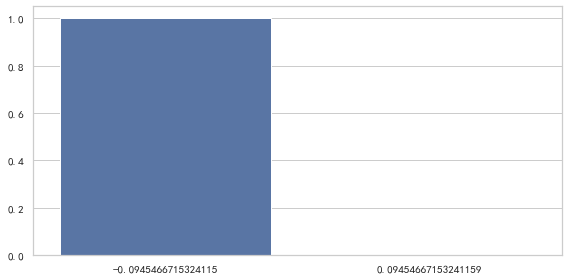

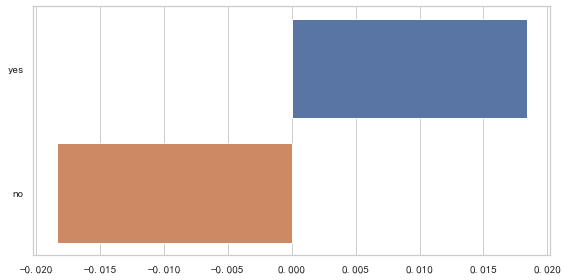

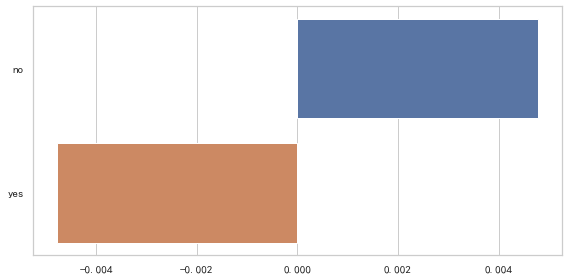

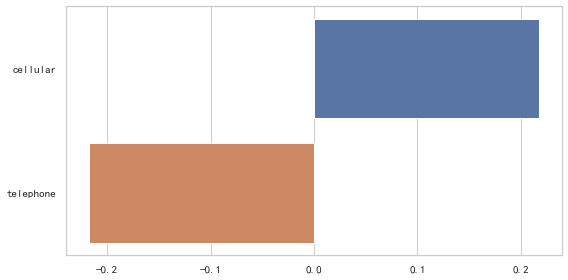

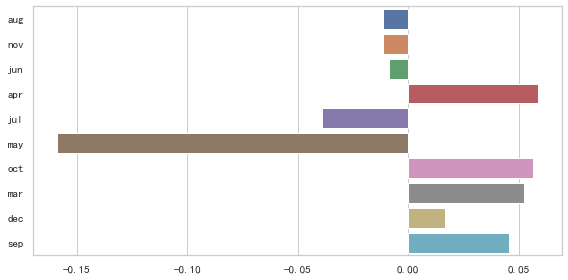

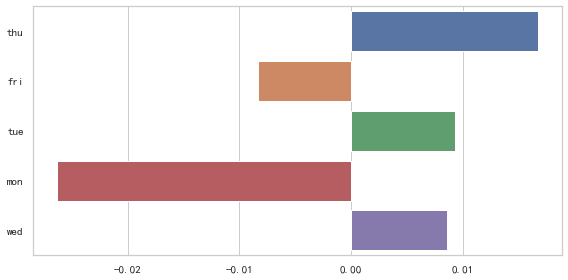

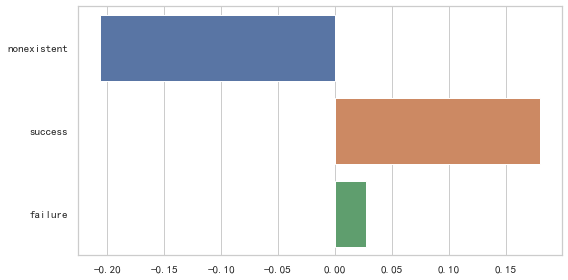

In [48]:
dfn = data[data['y']==0]
dfy = data[data['y']==1]
for col in cat_vars:
    plt.figure(figsize=(8,4))
    val_list = list(data[col].unique())
    y_count = dfy[col].value_counts().to_dict()
    n_count = dfn[col].value_counts().to_dict()
    #get(k,0)为了防止k不存在而返回None,直接返回0
    pct_list = [y_count.get(val,0)/dfy.shape[0]-n_count.get(val,0)/dfn.shape[0] for val in val_list] 
    sns.barplot(pct_list,val_list)
    plt.title = col
    plt.tight_layout()

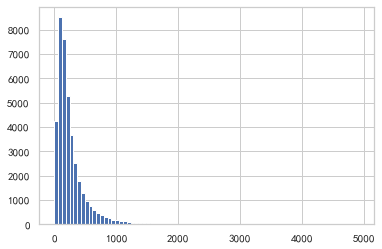

In [49]:
data['duration'].hist(bins=80)

### create dummy variables

In [50]:
data['contact'].value_counts()

cellular     25369
telephone    14434
Name: contact, dtype: int64

In [51]:
data['contact'].map({'cellular':0,"telephone":1})
data['y'].map({'no':0,'yes':1})
data['housing'].map({'no':0,'yes':1})
data['loan'].map({'no':0,'yes':1})

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    1
41187    0
Name: loan, Length: 39803, dtype: int64

In [52]:
for var in cat_vars:     # execute ony one time
    #cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var],prefix=var)
    #print(cat_list)
    data1 = data.join(cat_list)
    data = data1
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_Basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_0', 'default_1', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'da

In [53]:
data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep     #重新设定dataFrame的列

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_0',
 'default_1',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [54]:
data_final = data[to_keep]     #to_keep为新生成的所有feature
data_final.columns.values     #类别变量都需要转成dummy_variables

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_Basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_0', 'default_1', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcom

In [55]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
x = [i for i in data_final_vars if i not in y]
x

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_0',
 'default_1',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [56]:
x

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_0',
 'default_1',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [57]:
len(x)

55

### Feature selection

In [58]:
from sklearn import datasets
#recursive feature elimination 特征递归消除,来获得每一个自变量的重要程度,去除不重要的自变量,选择重要的自变量,找到对结果比较有影响的自变量
from sklearn.feature_selection import RFE     #RFE解释如上
from sklearn.linear_model import LogisticRegression

In [59]:
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [60]:
logreg = LogisticRegression()
rfe = RFE(logreg,14)     #第二个参数控制模型（特征）数量,后面True对应的变量就是要选择的,后面还会对字段的重要程度排序
rfe = rfe.fit(data_final[x],data_final[y])
print(rfe.support_)
print(rfe.ranking_)

E:\Anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'l

[False False False False  True False False False  True False False False
 False False False  True False False  True False False False False False
 False False  True False False False  True False False False False False
 False  True  True False False False  True  True  True False False False
  True False False False  True False  True]
[36 35 16 38  1 20 24 21  1 29 15  3  9 42 40  1 39  5  1 26 25 14 31 18
 23 22  1 17 11  8  1 41 32 27 34 12  2  1  1  4 19 10  1  1  1 33 30 13
  1 37 28  7  1  6  1]


E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
ind_list = [i for i,res_out in enumerate(list(rfe.support_)) if res_out == True]
x_sub = [x[i] for i in ind_list]
x_sub

['previous',
 'euribor3m',
 'job_retired',
 'job_student',
 'education_illiterate',
 'default_1',
 'month_apr',
 'month_aug',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_success']

In [63]:
x=data_final[x_sub]
y=data_final['y']

### Implementing the model

In [64]:
import statsmodels.api as sm 

In [65]:
x

,previous,euribor3m,job_retired,job_student,education_illiterate,default_1,month_apr,month_aug,month_mar,month_may,month_nov,day_of_week_mon,poutcome_failure,poutcome_success
0,0,4.963,0,0,0,1,0,1,0,0,0,0,0,0
1,0,4.021,0,0,0,0,0,0,0,0,1,0,0,0
2,2,0.729,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.405,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0.869,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,4.866,1,0,0,1,0,0,0,0,0,0,0,0
41184,0,4.860,0,0,0,1,0,0,0,1,0,0,0,0
41185,0,4.857,0,0,0,0,0,0,0,1,0,0,0,0
41186,0,0.742,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.282112
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.199     
Dependent Variable:   y                 AIC:               22485.7813
Date:                 2020-08-19 20:09  BIC:               22606.0651
No. Observations:     39803             Log-Likelihood:    -11229.   
Df Model:             13                LL-Null:           -14018.   
Df Residuals:         39789             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.2038   0.0520   3.9230 0.0001  0.1020  0.3056
euribor3m       

### logistic Regression Model Fitting

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [69]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = logreg.predict(x_test)
ana_result = pd.Series(y_pred.ravel())
ana_result.value_counts()

0    9653
1     298
dtype: int64

In [71]:
print(f"Accuracy of logistic regression classifier on test set:{logreg.score(x_test,y_test)}")

Accuracy of logistic regression classifier on test set:0.9002110340669279


### Cross validation

In [72]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [73]:
kfold = model_selection.KFold(n_splits=10,random_state=5)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv=kfold,scoring=scoring)
print(f"10 groups cross validation average accuracy:{results.mean()}")

E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

10 groups cross validation average accuracy:0.8993703054230743


E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[8754,   94],
       [ 899,  204]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8848
           1       0.68      0.18      0.29      1103

    accuracy                           0.90      9951
   macro avg       0.80      0.59      0.62      9951
weighted avg       0.88      0.90      0.87      9951



### ROC curve from sklearn import metrics

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr:[0.00000000e+00 0.00000000e+00 1.13019892e-04 1.13019892e-04
 2.26039783e-04 2.26039783e-04 3.39059675e-04 3.39059675e-04
 6.78119349e-04 6.78119349e-04 9.04159132e-04 9.04159132e-04
 1.01717902e-03 1.01717902e-03 1.13019892e-03 1.13019892e-03
 1.35623870e-03 1.35623870e-03 1.46925859e-03 1.46925859e-03
 1.46925859e-03 1.69529837e-03 1.69529837e-03 1.92133816e-03
 1.92133816e-03 2.03435805e-03 2.03435805e-03 2.14737794e-03
 2.14737794e-03 2.26039783e-03 2.26039783e-03 2.26039783e-03
 2.26039783e-03 2.26039783e-03 2.26039783e-03 2.37341772e-03
 2.37341772e-03 2.48643761e-03 2.48643761e-03 2.48643761e-03
 2.71247740e-03 2.93851718e-03 2.93851718e-03 3.16455696e-03
 3.27757685e-03 3.27757685e-03 3.39059675e-03 3.50361664e-03
 3.50361664e-03 3.61663653e-03 3.72965642e-03 3.72965642e-03
 3.72965642e-03 3.72965642e-03 3.84267631e-03 3.84267631e-03
 3.84267631e-03 3.84267631e-03 3.84267631e-03 3.95569620e-03
 3.95569620e-03 4.06871609e-03 4.06871609e-03 4.18173599e-03
 4.18173599e-03 4.29

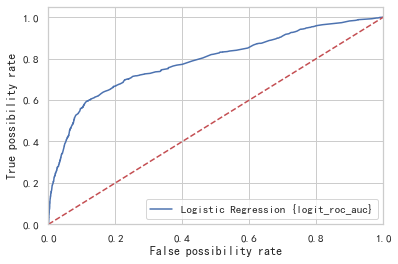

In [77]:
logit_roc_auc = roc_auc_score(y_test,logreg.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test,logreg.predict_proba(x_test)[:,1]) #true possibility和false possibility,predict_proba返回属于某标签的概率
print(f"fpr:{fpr},tpr:{tpr},thresholds:{thresholds}")
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression {logit_roc_auc}')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim(0.0,1.05)
plt.ylabel('True possibility rate')
plt.xlabel('False possibility rate')
plt.title='Reciever operating characteristic'
plt.legend(loc='lower right')
plt.show()